In [1]:
import pandas as pd


In [6]:
data = pd.read_csv('../raw_data/teamstats.csv')

In [7]:
data.head()

,gameID,teamID,season,date,location,goals,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result
0,81,89,2015,2015-08-08 15:45:00,h,1,0.627539,9,1,4,13.8261,12,1,2.0,0,W
1,81,82,2015,2015-08-08 15:45:00,a,0,0.674600,9,4,10,8.2188,12,2,3.0,0,L
2,82,73,2015,2015-08-08 18:00:00,h,0,0.876106,11,2,11,6.9000,13,6,3.0,0,L
3,82,71,2015,2015-08-08 18:00:00,a,1,0.782253,7,3,2,11.8462,13,3,4.0,0,W
4,83,72,2015,2015-08-08 18:00:00,h,2,0.604226,10,5,5,6.6500,7,8,1.0,0,D


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25360 entries, 0 to 25359
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gameID         25360 non-null  int64  
 1   teamID         25360 non-null  int64  
 2   season         25360 non-null  int64  
 3   date           25360 non-null  object 
 4   location       25360 non-null  object 
 5   goals          25360 non-null  int64  
 6   xGoals         25360 non-null  float64
 7   shots          25360 non-null  int64  
 8   shotsOnTarget  25360 non-null  int64  
 9   deep           25360 non-null  int64  
 10  ppda           25360 non-null  float64
 11  fouls          25360 non-null  int64  
 12  corners        25360 non-null  int64  
 13  yellowCards    25359 non-null  float64
 14  redCards       25360 non-null  int64  
 15  result         25360 non-null  object 
dtypes: float64(3), int64(10), object(3)
memory usage: 3.1+ MB


In [9]:
data['result']

0        W
1        L
2        L
3        W
4        D
        ..
25355    L
25356    L
25357    W
25358    D
25359    D
Name: result, Length: 25360, dtype: object

In [13]:
data.corr()

,gameID,teamID,season,goals,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards
gameID,1.000000,0.226970,0.892661,0.013579,0.043158,-0.018608,-0.008056,0.026216,0.136161,-0.074992,-0.026595,-0.009099,-0.024479
teamID,0.226970,1.000000,0.150536,-0.080661,-0.092100,-0.120406,-0.098014,-0.184740,0.051607,0.098213,-0.095563,0.049122,0.024532
season,0.892661,0.150536,1.000000,0.019383,0.049263,-0.014844,-0.003266,0.043943,0.148000,-0.109554,-0.023201,-0.015902,-0.028708
goals,0.013579,-0.080661,0.019383,1.000000,0.643079,0.317160,0.601782,0.299248,-0.076137,-0.074414,0.046531,-0.093939,-0.079942
xGoals,0.043158,-0.092100,0.049263,0.643079,1.000000,0.636310,0.686523,0.520403,-0.192414,-0.095645,0.277542,-0.096878,-0.094330
shots,-0.018608,-0.120406,-0.014844,0.317160,0.636310,1.000000,0.676556,0.584471,-0.316291,-0.121103,0.529004,-0.114701,-0.109207
shotsOnTarget,-0.008056,-0.098014,-0.003266,0.601782,0.686523,0.676556,1.000000,0.460491,-0.193573,-0.095036,0.310148,-0.107679,-0.093312
deep,0.026216,-0.184740,0.043943,0.299248,0.520403,0.584471,0.460491,1.000000,-0.273458,-0.148554,0.384163,-0.116682,-0.098011
ppda,0.136161,0.051607,0.148000,-0.076137,-0.192414,-0.316291,-0.193573,-0.273458,1.000000,-0.304770,-0.285743,-0.113505,0.057001
fouls,-0.074992,0.098213,-0.109554,-0.074414,-0.095645,-0.121103,-0.095036,-0.148554,-0.304770,1.000000,-0.092465,0.383880,0.067286


In [45]:
data['result_num'] = data['result'].apply(lambda x: -1 if x=='L' else 0 if x=='D' else 1)

In [46]:
data.corr()

,gameID,teamID,season,goals,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result_num
gameID,1.000000e+00,0.226970,8.926608e-01,0.013579,0.043158,-0.018608,-0.008056,0.026216,0.136161,-0.074992,-0.026595,-0.009099,-0.024479,-7.670354e-19
teamID,2.269697e-01,1.000000,1.505357e-01,-0.080661,-0.092100,-0.120406,-0.098014,-0.184740,0.051607,0.098213,-0.095563,0.049122,0.024532,-7.299264e-02
season,8.926608e-01,0.150536,1.000000e+00,0.019383,0.049263,-0.014844,-0.003266,0.043943,0.148000,-0.109554,-0.023201,-0.015902,-0.028708,1.406377e-16
goals,1.357916e-02,-0.080661,1.938273e-02,1.000000,0.643079,0.317160,0.601782,0.299248,-0.076137,-0.074414,0.046531,-0.093939,-0.079942,6.401886e-01
xGoals,4.315811e-02,-0.092100,4.926267e-02,0.643079,1.000000,0.636310,0.686523,0.520403,-0.192414,-0.095645,0.277542,-0.096878,-0.094330,4.588941e-01
shots,-1.860823e-02,-0.120406,-1.484430e-02,0.317160,0.636310,1.000000,0.676556,0.584471,-0.316291,-0.121103,0.529004,-0.114701,-0.109207,2.294212e-01
shotsOnTarget,-8.056473e-03,-0.098014,-3.265953e-03,0.601782,0.686523,0.676556,1.000000,0.460491,-0.193573,-0.095036,0.310148,-0.107679,-0.093312,4.180850e-01
deep,2.621635e-02,-0.184740,4.394283e-02,0.299248,0.520403,0.584471,0.460491,1.000000,-0.273458,-0.148554,0.384163,-0.116682,-0.098011,2.160079e-01
ppda,1.361608e-01,0.051607,1.479999e-01,-0.076137,-0.192414,-0.316291,-0.193573,-0.273458,1.000000,-0.304770,-0.285743,-0.113505,0.057001,-1.097707e-01
fouls,-7.499219e-02,0.098213,-1.095535e-01,-0.074414,-0.095645,-0.121103,-0.095036,-0.148554,-0.304770,1.000000,-0.092465,0.383880,0.067286,-3.259147e-02


<AxesSubplot:>

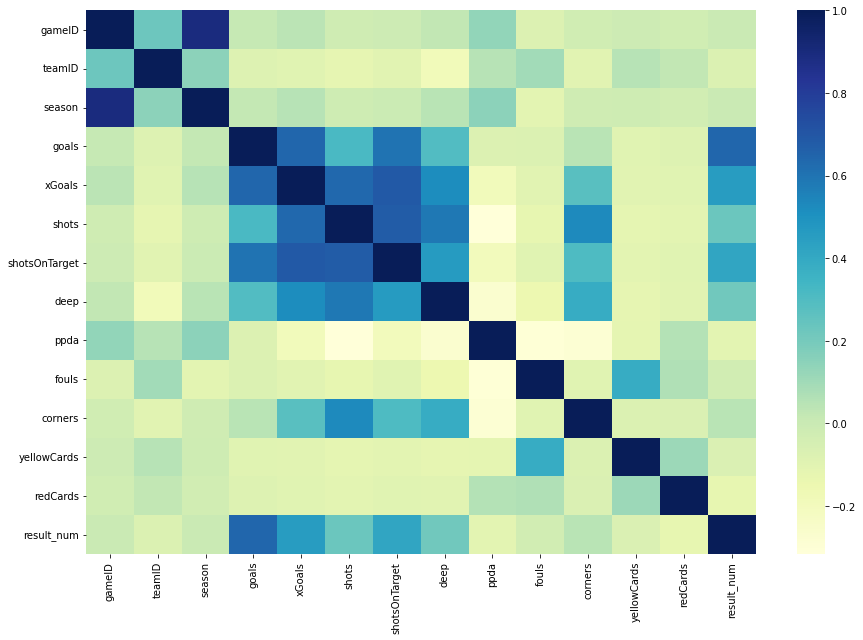

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap= "YlGnBu")

<AxesSubplot:xlabel='teamID'>

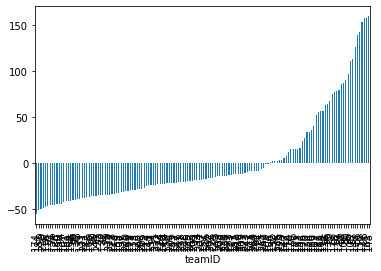

In [48]:
data.groupby('teamID')['result_num'].sum().sort_values().plot(kind='bar')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2f86a073d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2f86a07850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2f86a07100>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2f86a07df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2f86a14100>],
 'means': []}

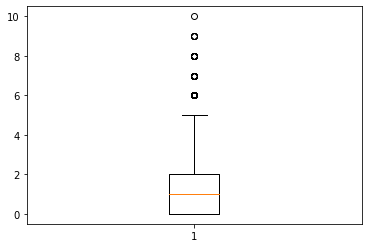

In [52]:
plt.boxplot(data['goals'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f2f86944b80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2f86952160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2f869448b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2f86952700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2f869529d0>],
 'means': []}

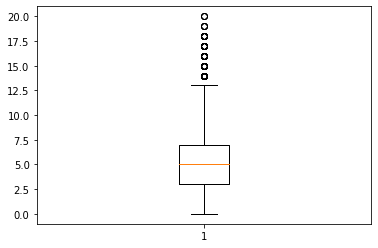

In [54]:
plt.boxplot(data['corners'])